In [1]:
pip install pandas numpy scikit-learn


In [4]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/archive.zip'
extraction_dir = '/content/extracted_files/'

# Create extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the extracted files
extracted_files = os.listdir(extraction_dir)
print(extracted_files)


['Sample_Submission.csv', 'Training Dataset.csv', 'Test Dataset.csv']


In [5]:
import pandas as pd

# Path to the extracted CSV file
training_data_path = os.path.join(extraction_dir, 'Training Dataset.csv')

# Load the dataset
training_data = pd.read_csv(training_data_path)

# Display the first few rows
print(training_data.head())



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Drop Loan_ID and Loan_Status as they are not relevant for clustering
data = training_data.drop(['Loan_ID', 'Loan_Status'], axis=1)

# Handle missing values
imputer = SimpleImputer(strategy='median')
data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = imputer.fit_transform(data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# Fill missing values in categorical columns with the most frequent value
data.fillna(data.mode().iloc[0], inplace=True)

# One-hot encode categorical variables
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
categorical_data = one_hot_encoder.fit_transform(data[categorical_columns])

# Normalize numerical features
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
scaler = StandardScaler()
numerical_data = scaler.fit_transform(data[numerical_columns])

# Combine categorical and numerical data
processed_data = pd.DataFrame(data=np.hstack((numerical_data, categorical_data)))

# Display the first few rows of the processed data
print(processed_data.head())


         0         1         2         3         4    5    6    7    8    9   \
0  0.072991 -0.554487 -0.211241  0.273231  0.411733  1.0  0.0  0.0  0.0  0.0   
1 -0.134412 -0.038732 -0.211241  0.273231  0.411733  1.0  1.0  1.0  0.0  0.0   
2 -0.393747 -0.554487 -0.948996  0.273231  0.411733  1.0  1.0  0.0  0.0  0.0   
3 -0.462062  0.251980 -0.306435  0.273231  0.411733  1.0  1.0  0.0  0.0  0.0   
4  0.097728 -0.554487 -0.056551  0.273231  0.411733  1.0  0.0  0.0  0.0  0.0   

    10   11   12   13  
0  0.0  0.0  0.0  1.0  
1  0.0  0.0  0.0  0.0  
2  0.0  1.0  0.0  1.0  
3  1.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  1.0  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


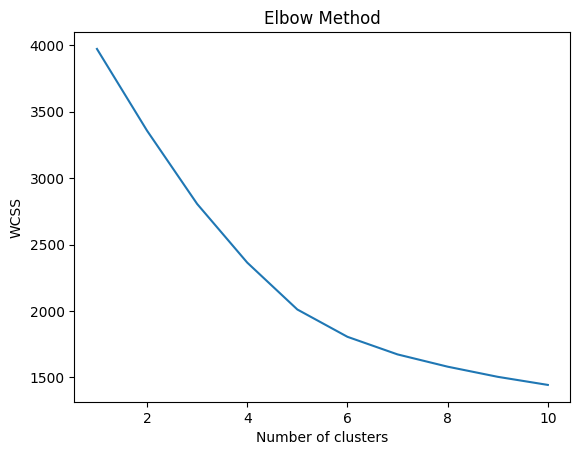

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  Cluster  
0             1.0         Urban           Y        0  
1             1.0         Rural           N     

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(processed_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit KMeans with the optimal number of clusters
optimal_clusters = 3  # You can choose the optimal number based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(processed_data)

# Add the cluster labels to the original data
training_data['Cluster'] = clusters
print(training_data.head())
